In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from src import DataModule
import matplotlib.pyplot as plt
import random

In [22]:
dm1 = DataModule(Dataset="DatasetFCIm")

dm1.setup()

In [27]:
dm2 = DataModule(train_trans={
	# 'HorizontalFlip': {'p': 1},
	# 'VerticalFlip': {'p': 0.5},
	# 'RandomRotate90': {'p': 0.5},
	'Transpose': {'p': 1},
}, Dataset="DatasetFCIm")

dm2.setup()

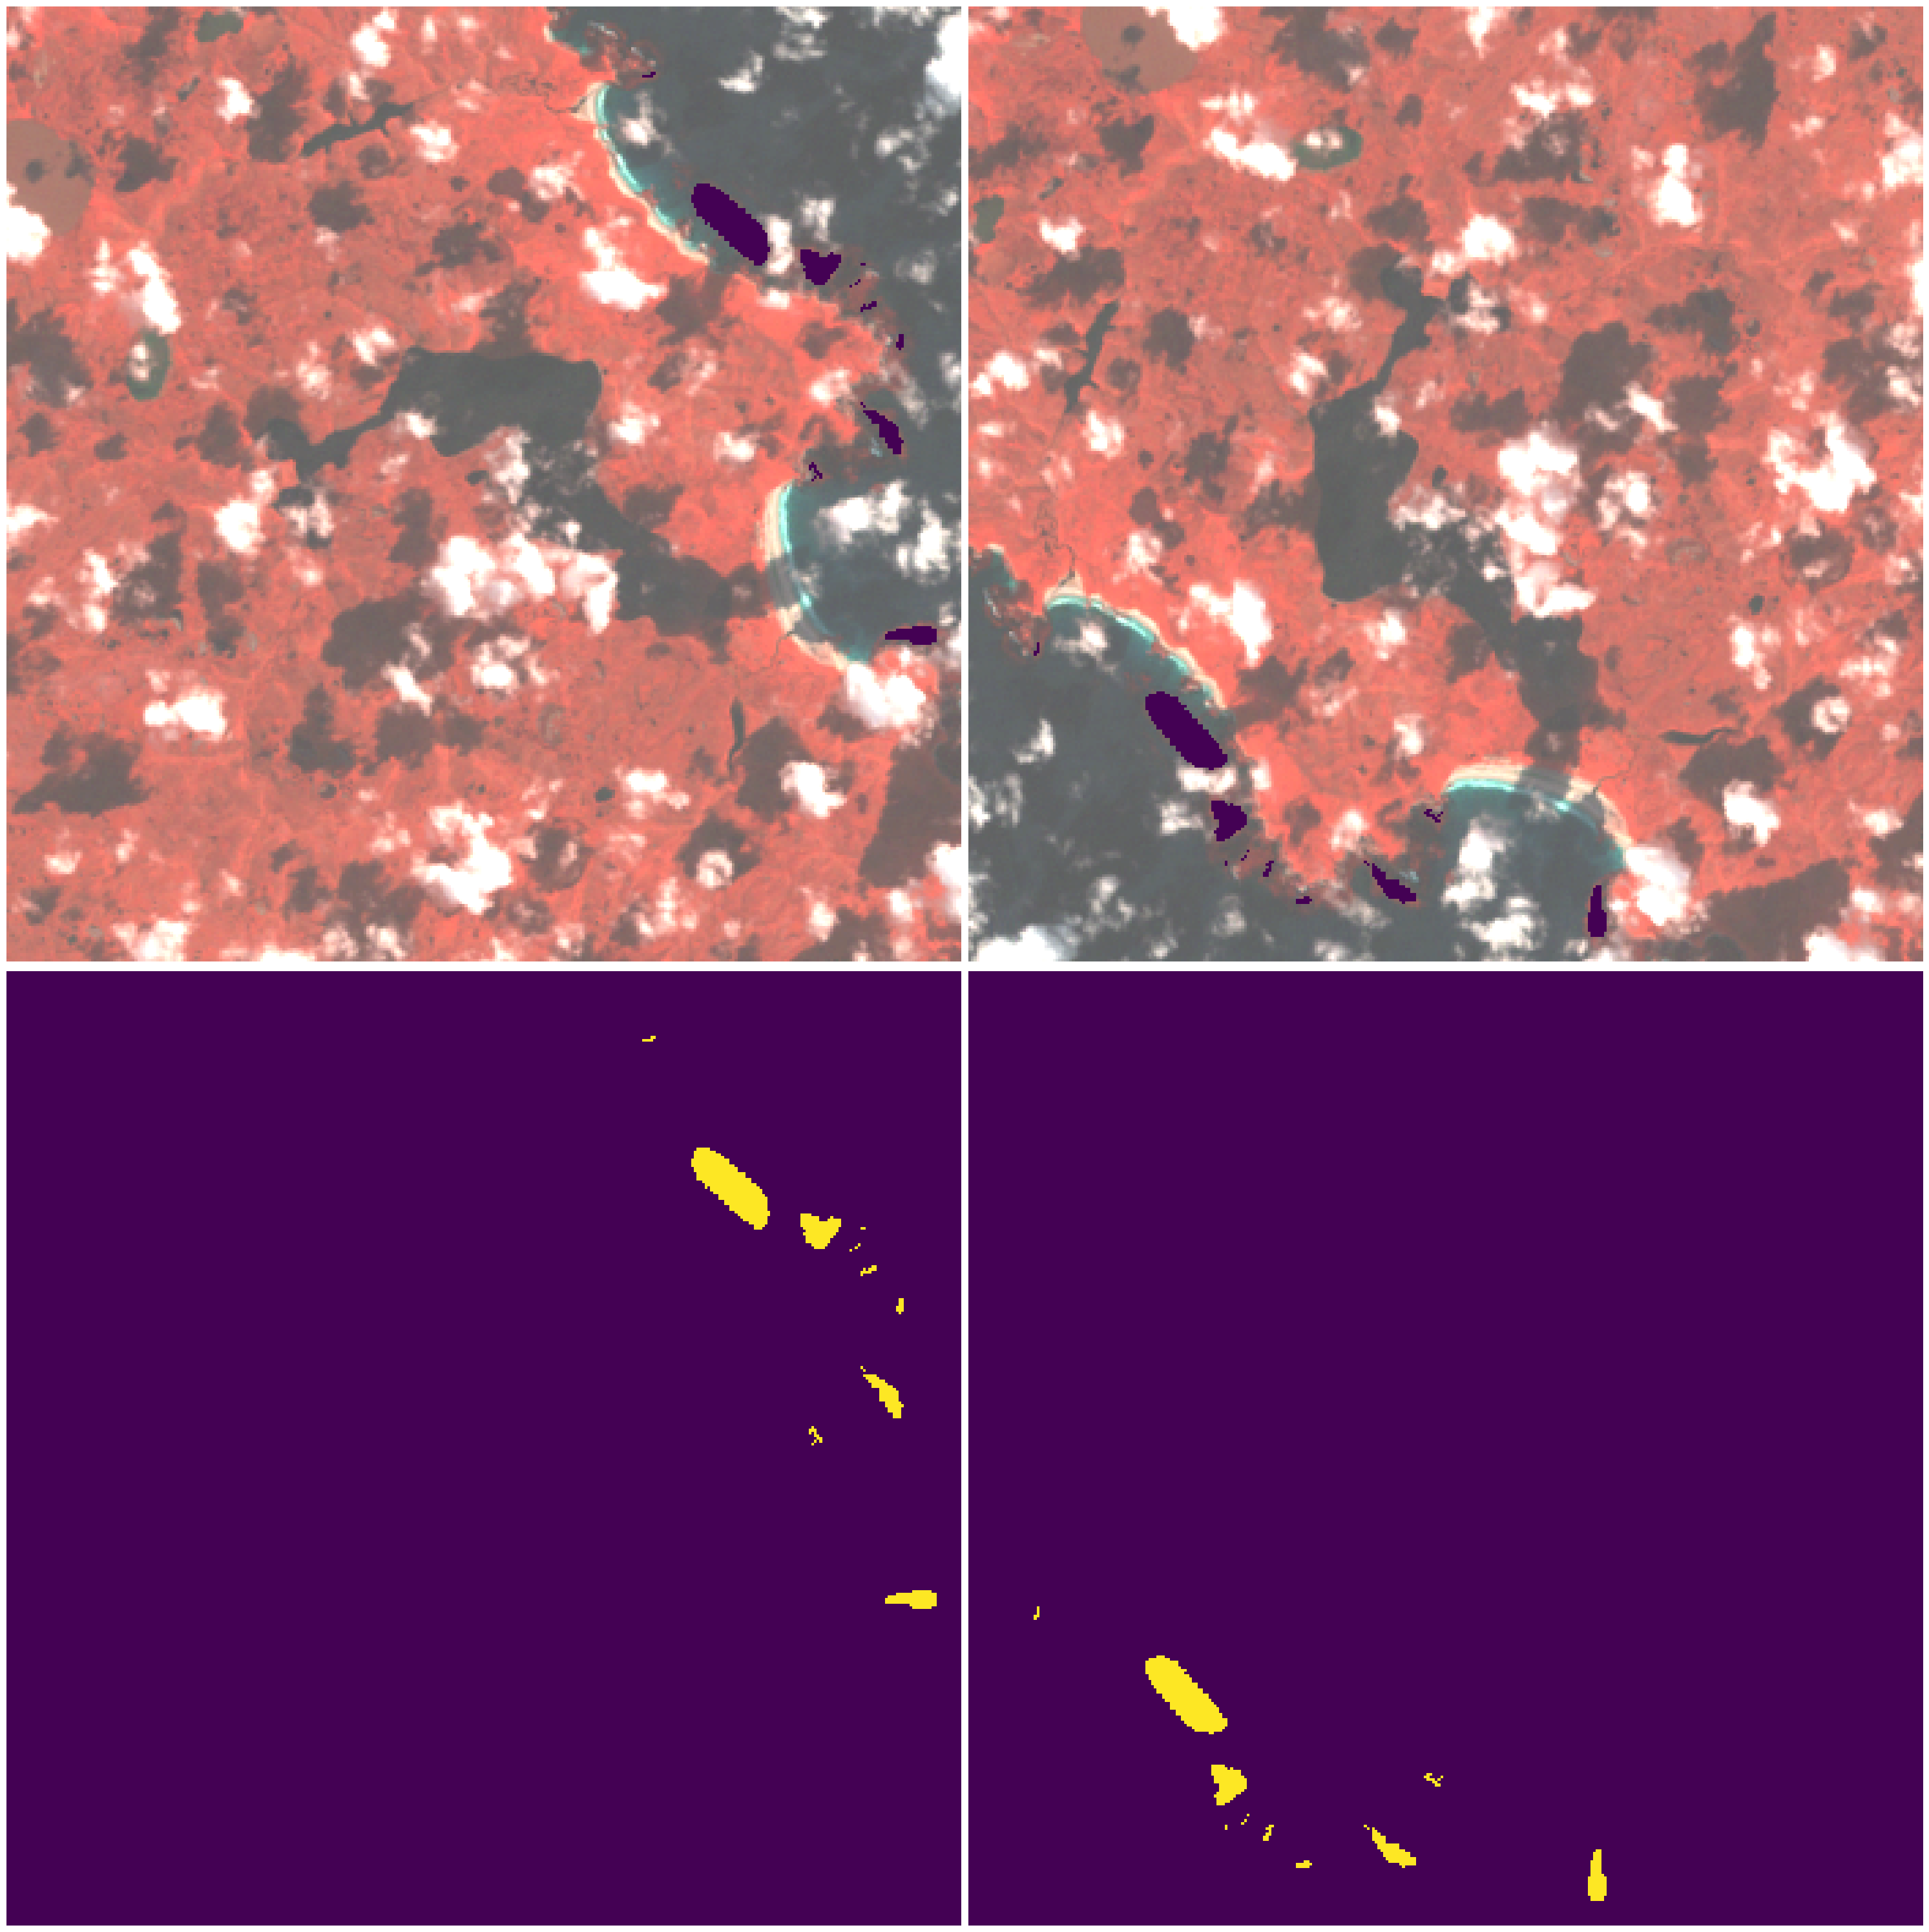

In [51]:
import numpy as np

rows, cols = 2, 2
fig, axs = plt.subplots(rows, cols, figsize=(30, 30))
ix = random.randint(0, len(dm1.train_ds)-1)
img, mask = dm1.train_ds[ix]
img = img[...,:3]
axs[0, 0].imshow(img)
axs[0, 0].axis('off')
axs[1, 0].imshow(mask)
axs[1, 0].axis('off')
axs[0, 0].imshow(np.ma.masked_where(mask < 0.5, mask))
for col in range(1, cols):
	img, mask = dm2.train_ds[ix]
	img = img[...,:3]
	axs[0, col].imshow(img)
	axs[0, col].axis('off')
	axs[1, col].imshow(mask)
	axs[1, col].axis('off')
	# see only values greater than 0.5, the rest should be completely transparent
	mask = np.ma.masked_where(mask < 0.5, mask)
	axs[0, col].imshow(mask)

plt.tight_layout()
plt.show()

In [6]:
dm2 = DataModule(train_trans={
	'RandomResizedCrop': {'p': 1., 'width': 350, 'height': 350},
})

dm2.setup()

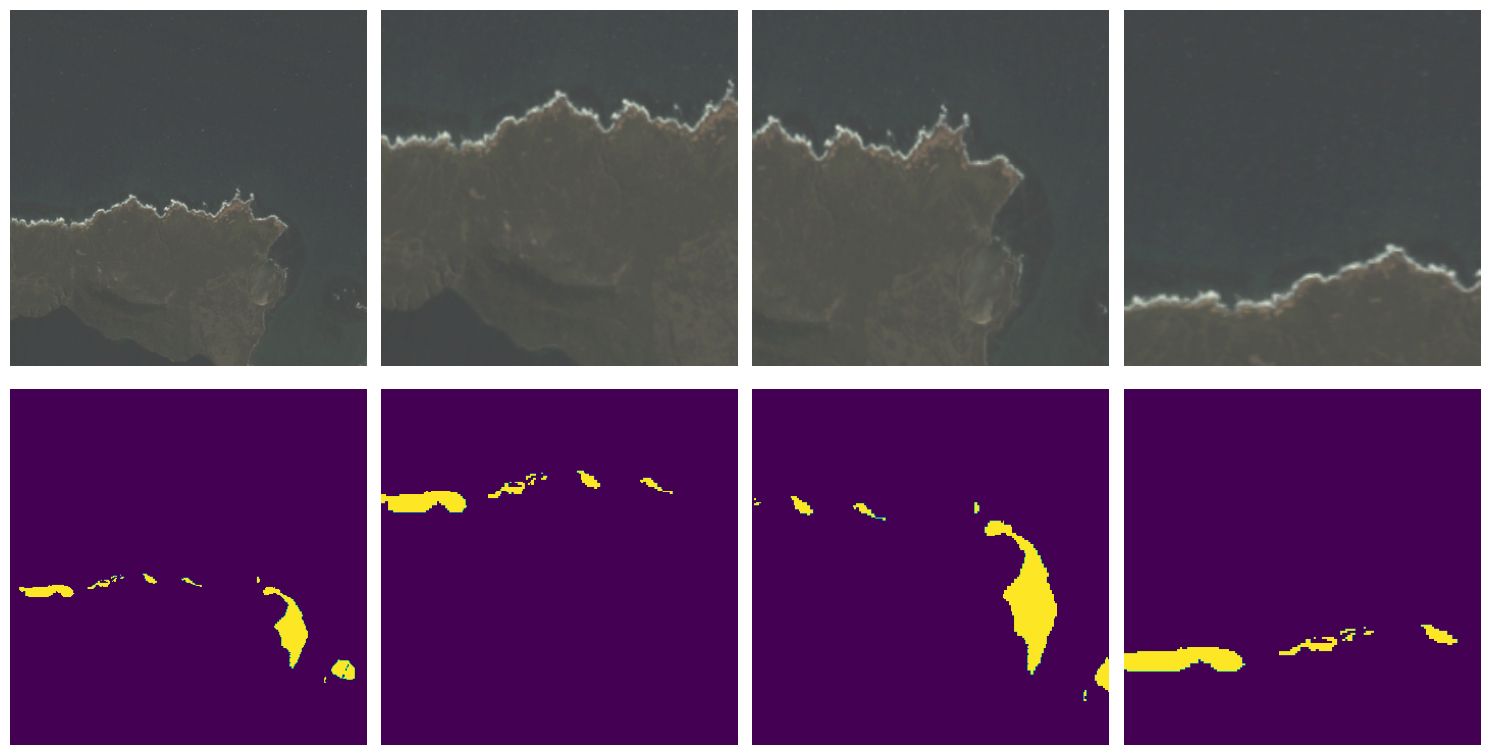

In [7]:
rows, cols = 2, 4 
fig, axs = plt.subplots(rows, cols, figsize=(15, 8))
ix = 10 #random.randint(0, len(dm1.train_ds)-1)
img, mask = dm1.train_ds[ix]
axs[0, 0].imshow(img)
axs[0, 0].axis('off')
axs[1, 0].imshow(mask)
axs[1, 0].axis('off')
for col in range(1, cols):
	img, mask = dm2.train_ds[ix]
	axs[0, col].imshow(img)
	axs[0, col].axis('off')
	axs[1, col].imshow(mask)
	axs[1, col].axis('off')
plt.tight_layout()
plt.show()

In [10]:
dm2 = DataModule(train_trans={
	'HorizontalFlip': {'p': 0.5},
	'VerticalFlip': {'p': 0.5},
	'RandomRotate90': {'p': 0.5},
	'Transpose': {'p': 0.5},
	'RandomResizedCrop': {'p': 0.5, 'width': 350, 'height': 350},
})

dm2.setup()

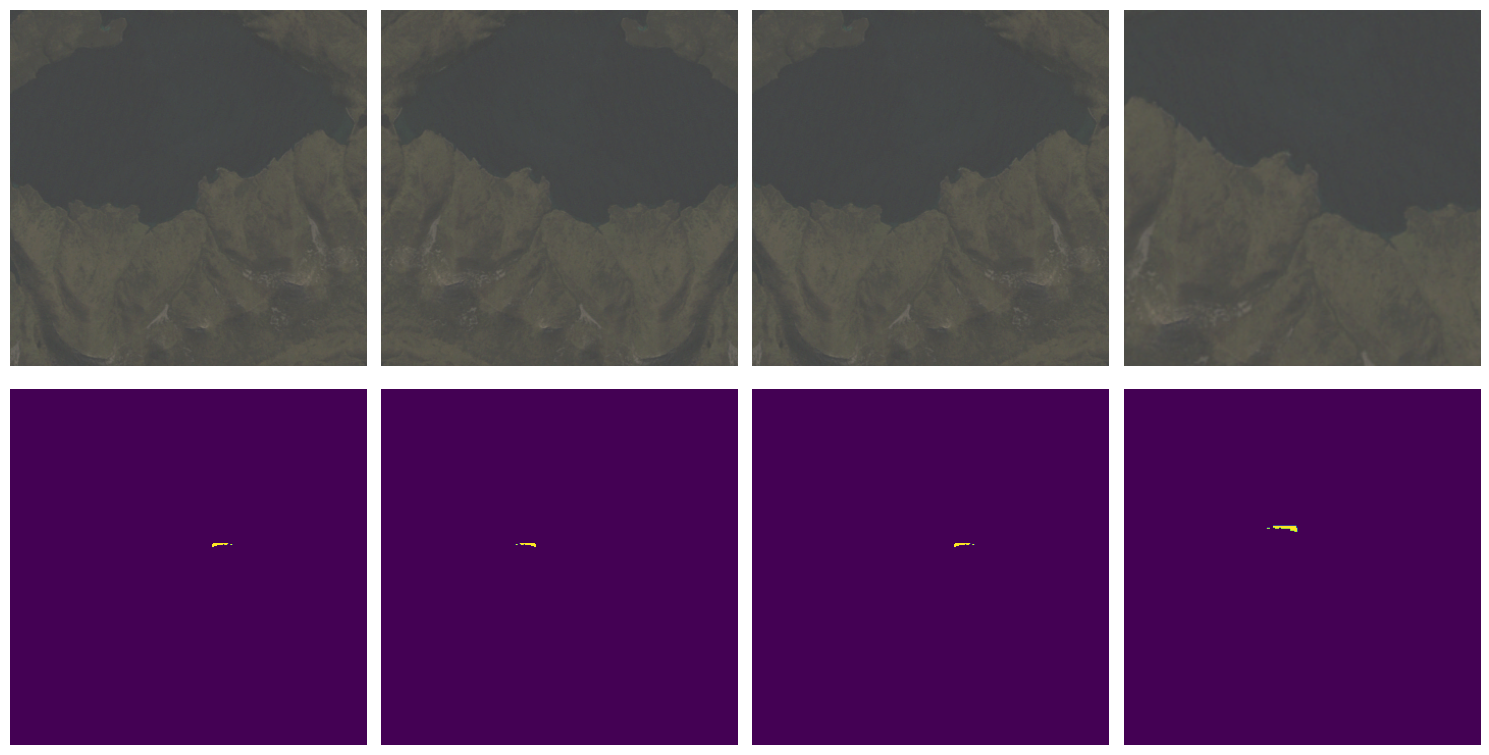

In [22]:
rows, cols = 2, 4 
fig, axs = plt.subplots(rows, cols, figsize=(15, 8))
ix = random.randint(0, len(dm1.train_ds)-1)
img, mask = dm1.train_ds[ix]
axs[0, 0].imshow(img)
axs[0, 0].axis('off')
axs[1, 0].imshow(mask)
axs[1, 0].axis('off')
for col in range(1, cols):
	img, mask = dm2.train_ds[ix]
	axs[0, col].imshow(img)
	axs[0, col].axis('off')
	axs[1, col].imshow(mask)
	axs[1, col].axis('off')
plt.tight_layout()
plt.show()